In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [40]:
data = pd.read_csv("Dataset_Child (1).csv")
data

,Child_ID,Age,Daily_Screen_Time_Hours,Preferred_Activity,Device_Dependency_Score,Emotional_Response_To_No_Device,Parental_Control_Strictness,Impact_on_Academics,Impact_on_Sleep,Physical_Activity_Level,...,Emotional_Regulation_Use,Parental_Monitoring_Level,Gender,Teacher_Feedback,Participation_in_Extracurricular_Activities,Parental_Involvement_in_Education,Peer_Relationship_Quality,Stress_Levels,Favorite_Subject,Hours_of_Sleep
0,Child_3531,11.0,5.7,YouTube Kids,10.0,Irritable,3.0,Positive,Neutral,Moderate,...,Occasional,High,Female,Student's high screen time is impacting classr...,Low,Low,Poor,Moderate,Literature,5.3
1,Child_3675,NaN,1.8,Edu Apps,6.0,Irritable,NaN,NaN,Improved,loww,...,Rare,Moderate,unknown,Student is performing well in class and demons...,NaN,NaN,Good,Low,Physical Education,5.4
2,Child_1295,12.0,3.5,Video Watching,8.0,Unbothered,4.0,NaN,Neutral,HIGH,...,Rare,Moderate,Male,Student is maintaining a satisfactory performa...,High,High,Poor,Moderate,Art,5.7
3,Child_316,10.0,0.8,Gamee,10.0,Distressed,1.0,NaN,Improved,moderate,...,Frequent,Moderate,malee,Student is performing well in class and demons...,Low,NaN,Poor,High,Math,9.2
4,NaN,6.0,4.6,Gamee,1.0,Unbothered,3.0,HIGH,Disrupted,NaN,...,Rare,High,femaale,Student's high screen time is impacting classr...,Low,NaN,Average,Moderate,Literature,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4199,Child_1659,5.0,3.9,Gaming,4.0,Unbothered,4.0,Positive,Disrupted,High,...,NaN,Moderate,Female,Student is maintaining a satisfactory performa...,High,NaN,Excellent,High,Art,5.2
4200,Child_1914,7.0,1.6,Video Watching,5.0,Irritable,3.0,NaN,Disrupted,NaN,...,Occasional,Moderate,NaN,Student is performing well in class and demons...,High,Moderate,Poor,Low,Art,9.0
4201,Child_2194,9.0,NaN,Video Watching,2.0,Irritable,2.0,Negative,NaN,High,...,Frequent,Moderate,Male,No feedback provided due to missing data.,NaN,Low,Good,High,Science,6.7
4202,Child_2949,7.0,16.0,Video-Watching,8.0,Irritable,3.0,loww,Disrupted,HIGH,...,Occasional,Moderate,malee,Student's high screen time is impacting classr...,Low,Moderate,Good,High,Literature,6.1


Exploring Data

In [41]:
data.head()

,Child_ID,Age,Daily_Screen_Time_Hours,Preferred_Activity,Device_Dependency_Score,Emotional_Response_To_No_Device,Parental_Control_Strictness,Impact_on_Academics,Impact_on_Sleep,Physical_Activity_Level,...,Emotional_Regulation_Use,Parental_Monitoring_Level,Gender,Teacher_Feedback,Participation_in_Extracurricular_Activities,Parental_Involvement_in_Education,Peer_Relationship_Quality,Stress_Levels,Favorite_Subject,Hours_of_Sleep
0,Child_3531,11.0,5.7,YouTube Kids,10.0,Irritable,3.0,Positive,Neutral,Moderate,...,Occasional,High,Female,Student's high screen time is impacting classr...,Low,Low,Poor,Moderate,Literature,5.3
1,Child_3675,NaN,1.8,Edu Apps,6.0,Irritable,NaN,NaN,Improved,loww,...,Rare,Moderate,unknown,Student is performing well in class and demons...,NaN,NaN,Good,Low,Physical Education,5.4
2,Child_1295,12.0,3.5,Video Watching,8.0,Unbothered,4.0,NaN,Neutral,HIGH,...,Rare,Moderate,Male,Student is maintaining a satisfactory performa...,High,High,Poor,Moderate,Art,5.7
3,Child_316,10.0,0.8,Gamee,10.0,Distressed,1.0,NaN,Improved,moderate,...,Frequent,Moderate,malee,Student is performing well in class and demons...,Low,NaN,Poor,High,Math,9.2
4,NaN,6.0,4.6,Gamee,1.0,Unbothered,3.0,HIGH,Disrupted,NaN,...,Rare,High,femaale,Student's high screen time is impacting classr...,Low,NaN,Average,Moderate,Literature,6.5


In [42]:
data.dtypes

Child_ID                                        object
Age                                            float64
Daily_Screen_Time_Hours                        float64
Preferred_Activity                              object
Device_Dependency_Score                        float64
Emotional_Response_To_No_Device                 object
Parental_Control_Strictness                    float64
Impact_on_Academics                             object
Impact_on_Sleep                                 object
Physical_Activity_Level                         object
Social_Interactions_Preference                  object
Parent_Screen_Time_Habits                       object
Sibling_Influence                               object
Cognitive_Impact                                object
Emotional_Regulation_Use                        object
Parental_Monitoring_Level                       object
Gender                                          object
Teacher_Feedback                                object
Participat

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4204 entries, 0 to 4203
Data columns (total 24 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Child_ID                                     3571 non-null   object 
 1   Age                                          3569 non-null   float64
 2   Daily_Screen_Time_Hours                      3660 non-null   float64
 3   Preferred_Activity                           3765 non-null   object 
 4   Device_Dependency_Score                      3645 non-null   float64
 5   Emotional_Response_To_No_Device              3561 non-null   object 
 6   Parental_Control_Strictness                  3674 non-null   float64
 7   Impact_on_Academics                          3760 non-null   object 
 8   Impact_on_Sleep                              3568 non-null   object 
 9   Physical_Activity_Level                      3776 non-null   object 
 10  

In [44]:
data.describe() 

,Age,Daily_Screen_Time_Hours,Device_Dependency_Score,Parental_Control_Strictness,Hours_of_Sleep
count,3569.000000,3660.000000,3645.000000,3674.000000,4204.000000
mean,7.470160,5.360486,6.626063,4.210942,7.510966
std,3.266948,5.117797,4.213997,3.156225,1.452326
min,-9.000000,0.500000,1.000000,1.000000,5.000000
25%,5.000000,2.200000,3.000000,2.000000,6.200000
50%,7.000000,3.800000,6.000000,4.000000,7.500000
75%,10.000000,5.500000,9.000000,5.000000,8.800000
max,100.000000,23.900000,20.000000,15.000000,10.000000


In [45]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4199    False
4200     True
4201     True
4202     True
4203     True
Length: 4204, dtype: bool

In [46]:
data = data.drop_duplicates()
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4195    False
4196    False
4197    False
4198    False
4199    False
Length: 4200, dtype: bool

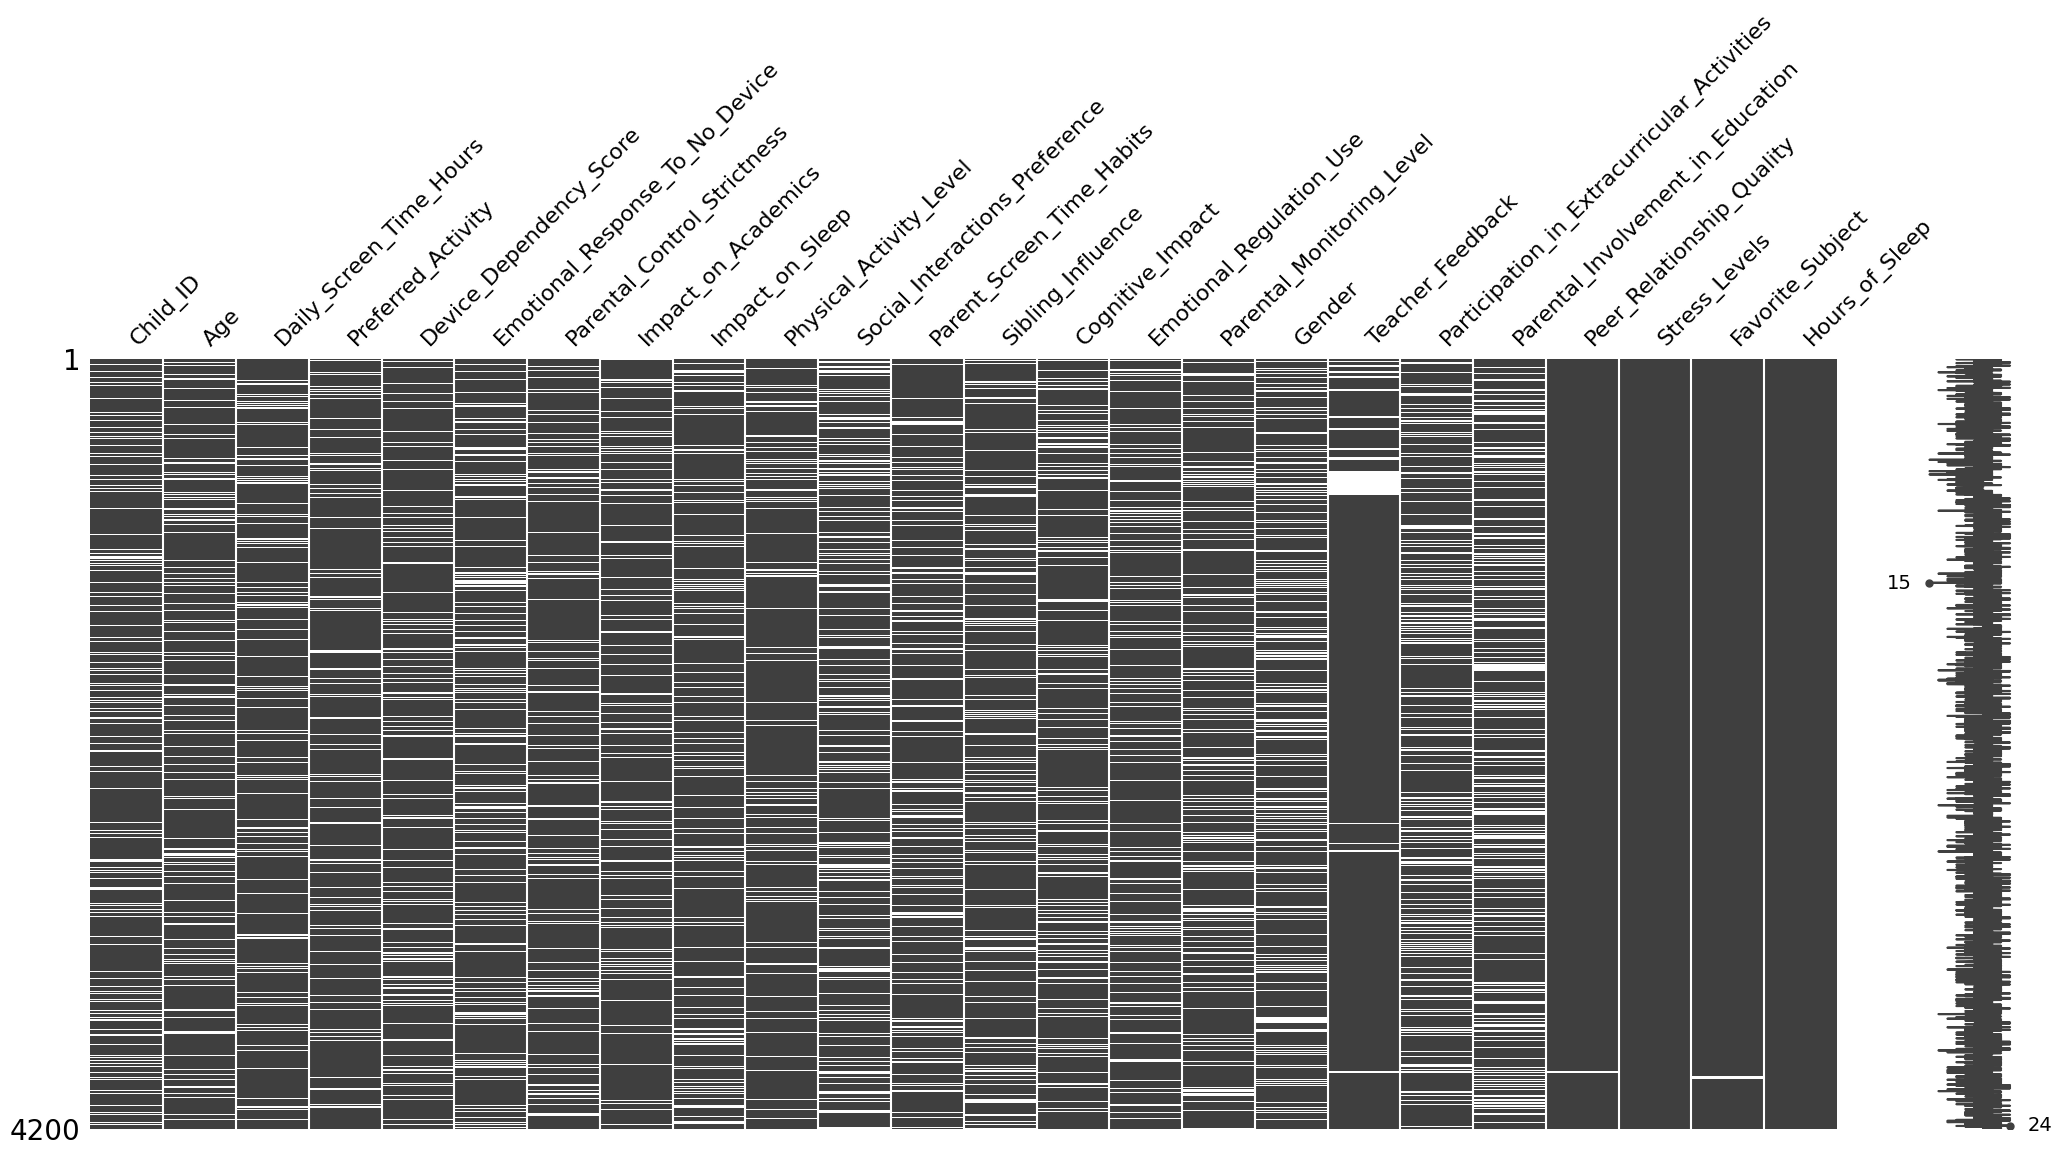

In [47]:
msno.matrix(data)
plt.show()

In [48]:
print(data.isnull().sum())

Child_ID                                        632
Age                                             634
Daily_Screen_Time_Hours                         543
Preferred_Activity                              438
Device_Dependency_Score                         559
Emotional_Response_To_No_Device                 643
Parental_Control_Strictness                     530
Impact_on_Academics                             442
Impact_on_Sleep                                 635
Physical_Activity_Level                         427
Social_Interactions_Preference                  769
Parent_Screen_Time_Habits                       622
Sibling_Influence                               630
Cognitive_Impact                                638
Emotional_Regulation_Use                        636
Parental_Monitoring_Level                       644
Gender                                          844
Teacher_Feedback                                258
Participation_in_Extracurricular_Activities    1019
Parental_Inv

Inconsistencey Handling 

In [49]:
#Gender inconsistencey handling 
data['Gender'].unique()

data.loc[:, 'Gender'] = data['Gender'].replace({
    'malee': 'Male',
    'femaale': 'Female',
    'F': 'Female',
    'unknown': data['Gender'].mode()[0]
    
})
data.loc[:, 'Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [50]:
#Age inconsistencey handling 

inconsistent_age = data[(data['Age'] < 0) | (data['Age'] > 13)]
inconsistent_age
data = data.drop(inconsistent_age.index)

In [51]:
#Preferred_Activity inconsistencey handling 


activity_handle = {
    'YouTubeKid': 'YouTube Kids',
    'Video-Watching': 'Video Watching',
    'Edu Apps': 'Educational Apps',
    'Gamee': 'Gaming'
}

data['Preferred_Activity'] = data['Preferred_Activity'].replace(activity_handle)
data['Preferred_Activity'].unique()

array(['YouTube Kids', 'Educational Apps', 'Video Watching', 'Gaming',
       nan], dtype=object)

In [52]:
#Teacher_Feedback inconsistencey handling 

Feedback_handle = {
    'isufigifgb  fiuewhfwef' : 'No feedback provided due to missing data.',
    'No Feedback' : 'No feedback provided due to missing data.'
}
data['Teacher_Feedback'] = data['Teacher_Feedback'].replace(Feedback_handle)
data['Teacher_Feedback'] = data['Teacher_Feedback'].fillna("No feedback provided due to missing data.")

data['Teacher_Feedback'].nunique()

5

In [53]:
#No Device_Dependency_Score inconsistencey
data[data['Device_Dependency_Score'] < 0]

,Child_ID,Age,Daily_Screen_Time_Hours,Preferred_Activity,Device_Dependency_Score,Emotional_Response_To_No_Device,Parental_Control_Strictness,Impact_on_Academics,Impact_on_Sleep,Physical_Activity_Level,...,Emotional_Regulation_Use,Parental_Monitoring_Level,Gender,Teacher_Feedback,Participation_in_Extracurricular_Activities,Parental_Involvement_in_Education,Peer_Relationship_Quality,Stress_Levels,Favorite_Subject,Hours_of_Sleep


In [54]:
#No Emotional_Response_To_No_Device inconsistencey

data['Emotional_Response_To_No_Device'].unique()

array(['Irritable', 'Unbothered', 'Distressed', 'Neutral', nan],
      dtype=object)

In [55]:
#No Parental_Control_Strictness inconsistencey

data[data['Parental_Control_Strictness'] < 0]

,Child_ID,Age,Daily_Screen_Time_Hours,Preferred_Activity,Device_Dependency_Score,Emotional_Response_To_No_Device,Parental_Control_Strictness,Impact_on_Academics,Impact_on_Sleep,Physical_Activity_Level,...,Emotional_Regulation_Use,Parental_Monitoring_Level,Gender,Teacher_Feedback,Participation_in_Extracurricular_Activities,Parental_Involvement_in_Education,Peer_Relationship_Quality,Stress_Levels,Favorite_Subject,Hours_of_Sleep


In [58]:
#Impact_on_Academics inconsistencey handling 

impact_handle = {
    'positiv': 'Positive',
    'negativee': 'Negative',
    'neutral': 'Neutral',
    'LOW': 'Low',
    'loww': 'Low',
    'HIGH': 'High',
    'moderate': 'Moderate',
    'Positive': 'High',
    'Neutral' : 'Moderate',
    'Negative':'Low'
}

data['Impact_on_Academics'] = data['Impact_on_Academics'].replace(impact_handle)
data['Impact_on_Academics'].unique() 

array(['High', nan, 'Moderate', 'Low'], dtype=object)

In [57]:
#No Impact_on_Sleep inconsistencey
data['Impact_on_Sleep'].unique() 

array(['Neutral', 'Improved', 'Disrupted', nan], dtype=object)

In [24]:
#Physical_Activity_Level inconsistencey handling 

Physical_handle = {
    'positiv': 'Positive',
    'negativee': 'Negative',
    'neutral': 'Neutral',
    'LOW': 'Low',
    'loww': 'Low',
    'HIGH': 'High',
    'moderate': 'Moderate',
    'Positive': 'High',
    'Neutral' : 'Moderate',
    'Negative':'Low'
}

data['Physical_Activity_Level'] = data['Physical_Activity_Level'].replace(Physical_handle)

data['Physical_Activity_Level'].unique() 

array(['Moderate', 'Low', 'High', nan], dtype=object)

In [25]:
#Social_Interactions_Preference inconsistencey handling 

Social_handle = {
    'onliine': 'Online',
    'balance': 'Balanced',
    'Offliine': 'Offline'
}

data['Social_Interactions_Preference'] = data['Social_Interactions_Preference'].replace(Social_handle)
data['Social_Interactions_Preference'].unique() 

array(['Offline', 'Online', nan, 'Balanced'], dtype=object)

In [435]:
#Parent_Screen_Time_Habits inconsistencey handling 

data['Parent_Screen_Time_Habits'] = data['Parent_Screen_Time_Habits'].replace('#VALUE!', np.nan)

data['Parent_Screen_Time_Habits'].unique() 

array(['Low', 'High', nan, 'Moderate'], dtype=object)

In [59]:
#No Sibling_Influence inconsistencey

data['Sibling_Influence'].unique() 

array([nan, 'Positive', 'Negative', 'Neutral'], dtype=object)

In [60]:
#No Cognitive_Impact inconsistencey

data['Cognitive_Impact'].unique() 

array([nan, 'Declined', 'Neutral', 'Improved'], dtype=object)

In [61]:
#No Emotional_Regulation_Use inconsistencey

data['Emotional_Regulation_Use'].unique() 

array(['Occasional', 'Rare', 'Frequent', nan], dtype=object)

In [62]:
#No Parental_Monitoring_Level inconsistencey

data['Parental_Monitoring_Level'].unique() 

array(['High', 'Moderate', 'Low', nan], dtype=object)

In [63]:
#No Participation_in_Extracurricular_Activities inconsistencey

data['Participation_in_Extracurricular_Activities'].unique() 

array(['Low', nan, 'High', 'Moderate'], dtype=object)

In [64]:
#No Parental_Involvement_in_Education inconsistencey

data['Parental_Involvement_in_Education'].unique() 

array(['Low', nan, 'High', 'Moderate'], dtype=object)

In [65]:
#No Peer_Relationship_Quality inconsistencey

data['Peer_Relationship_Quality'].unique() 

array(['Poor', 'Good', 'Average', 'Excellent', nan], dtype=object)

In [66]:
#No Stress_Levels inconsistencey

data['Stress_Levels'].unique() 

array(['Moderate', 'Low', 'High'], dtype=object)

In [67]:
#No Favorite_Subject inconsistencey

data['Favorite_Subject'].unique() 

array(['Literature', 'Physical Education', 'Art', 'Math', 'Science', nan],
      dtype=object)

In [68]:
#No Hours_of_Sleep inconsistencey

data[data['Hours_of_Sleep'] < 0]


,Child_ID,Age,Daily_Screen_Time_Hours,Preferred_Activity,Device_Dependency_Score,Emotional_Response_To_No_Device,Parental_Control_Strictness,Impact_on_Academics,Impact_on_Sleep,Physical_Activity_Level,...,Emotional_Regulation_Use,Parental_Monitoring_Level,Gender,Teacher_Feedback,Participation_in_Extracurricular_Activities,Parental_Involvement_in_Education,Peer_Relationship_Quality,Stress_Levels,Favorite_Subject,Hours_of_Sleep


In [70]:
# Fill null 'Child_ID' with unique IDs

def unique(row):
    new_id = np.random.randint(100, 4200)
    
    while new_id in data['Child_ID'].values:
        new += 1
    return new_id

data.loc[:,'Child_ID'] = data.loc[:,'Child_ID'].fillna(f'Child_{unique(data['Child_ID'])}')

Correlation & Heatmap

In [38]:
print(data.isnull().sum())

Child_ID                                          0
Age                                             634
Daily_Screen_Time_Hours                         543
Preferred_Activity                              438
Device_Dependency_Score                         559
Emotional_Response_To_No_Device                 643
Parental_Control_Strictness                     530
Impact_on_Academics                             441
Impact_on_Sleep                                 635
Physical_Activity_Level                         426
Social_Interactions_Preference                  769
Parent_Screen_Time_Habits                       621
Sibling_Influence                               630
Cognitive_Impact                                636
Emotional_Regulation_Use                        636
Parental_Monitoring_Level                       644
Gender                                            0
Teacher_Feedback                                  0
Participation_in_Extracurricular_Activities    1019
Parental_Inv

In [169]:
data.dtypes

Child_ID                                        object
Age                                            float64
Daily_Screen_Time_Hours                        float64
Preferred_Activity                              object
Device_Dependency_Score                        float64
Emotional_Response_To_No_Device                 object
Parental_Control_Strictness                    float64
Impact_on_Academics                             object
Impact_on_Sleep                                 object
Physical_Activity_Level                         object
Social_Interactions_Preference                  object
Parent_Screen_Time_Habits                       object
Sibling_Influence                               object
Cognitive_Impact                                object
Emotional_Regulation_Use                        object
Parental_Monitoring_Level                       object
Gender                                          object
Teacher_Feedback                                object
Participat

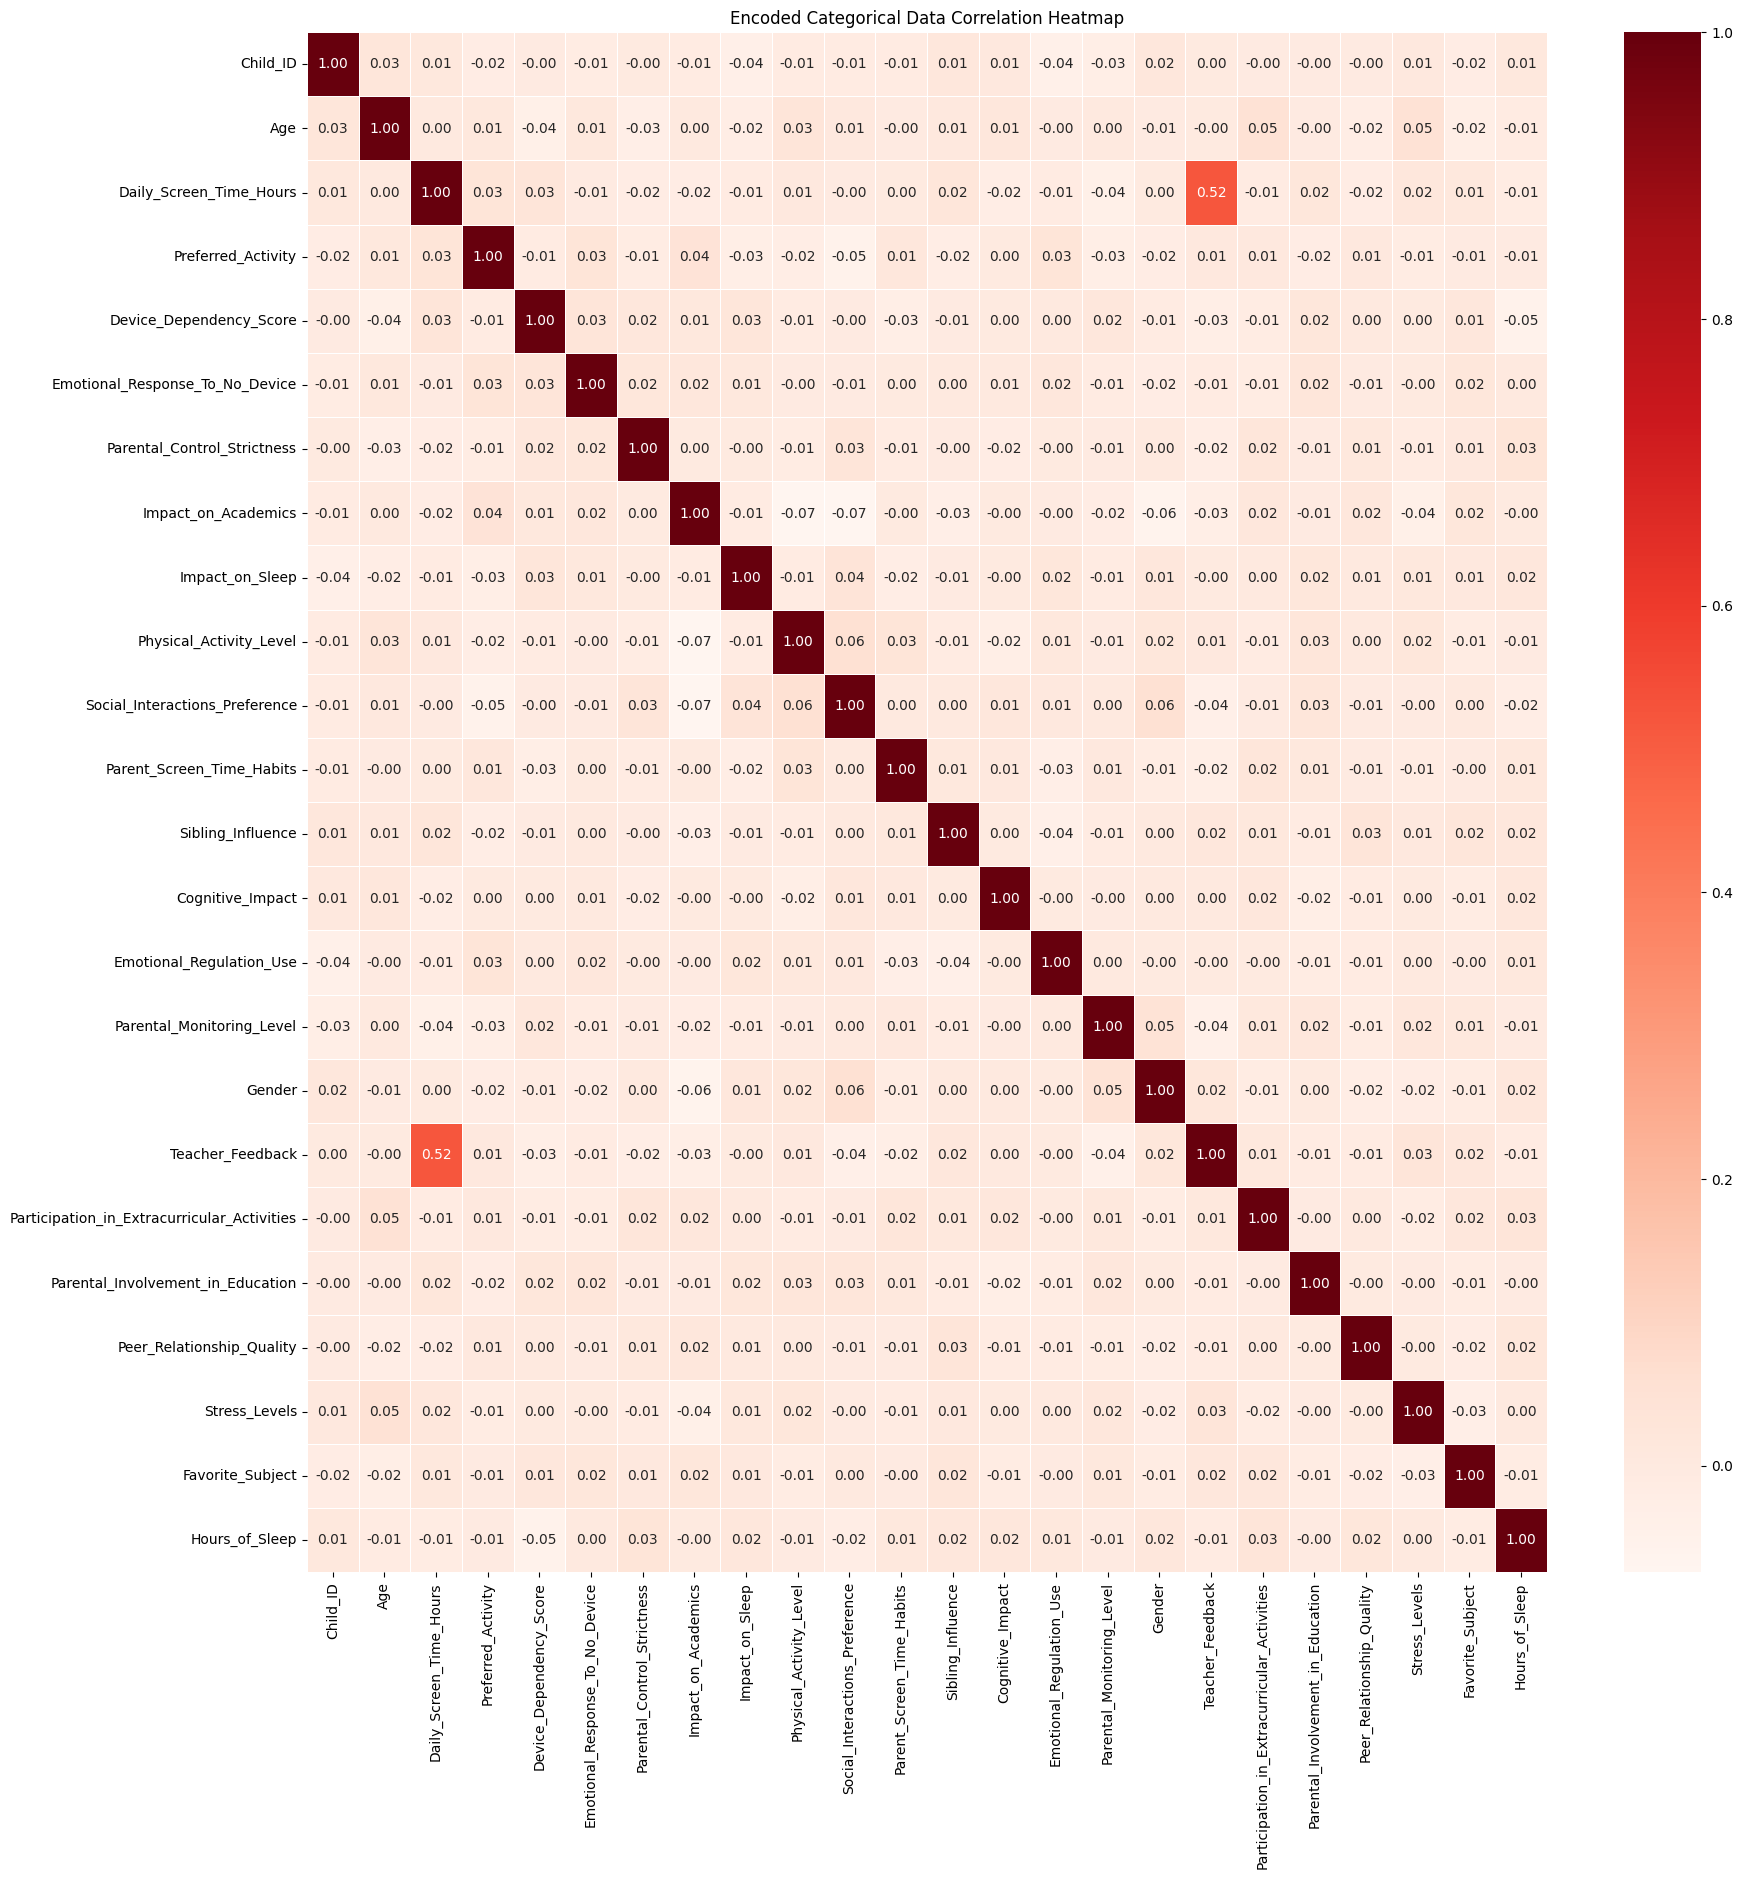

In [71]:
# Copy the dataframe just in case
encoded_df = data.copy()

# Categorical columns
categorical_columns = encoded_df.select_dtypes(include=['object']).columns

# Encode categorical columns using Label Encoding
for col in categorical_columns:
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col])

# correlation 
encoded_correlation_matrix = encoded_df.corr()

# Create a heatmap of the encoded data correlations
plt.figure(figsize=(20, 20))
sns.heatmap(encoded_correlation_matrix, annot=True, cmap="Reds", fmt=".2f", linewidths=0.5)
plt.title("Encoded Categorical Data Correlation Heatmap")
plt.show()


In [73]:
encoded_df.isnull().sum()

Child_ID                                         0
Age                                            634
Daily_Screen_Time_Hours                        543
Preferred_Activity                               0
Device_Dependency_Score                        559
Emotional_Response_To_No_Device                  0
Parental_Control_Strictness                    530
Impact_on_Academics                              0
Impact_on_Sleep                                  0
Physical_Activity_Level                          0
Social_Interactions_Preference                   0
Parent_Screen_Time_Habits                        0
Sibling_Influence                                0
Cognitive_Impact                                 0
Emotional_Regulation_Use                         0
Parental_Monitoring_Level                        0
Gender                                           0
Teacher_Feedback                                 0
Participation_in_Extracurricular_Activities      0
Parental_Involvement_in_Educati

In [74]:
encoded_df.nunique()

Child_ID                                       3399
Age                                              10
Daily_Screen_Time_Hours                         190
Preferred_Activity                                5
Device_Dependency_Score                          20
Emotional_Response_To_No_Device                   5
Parental_Control_Strictness                      15
Impact_on_Academics                               4
Impact_on_Sleep                                   4
Physical_Activity_Level                          10
Social_Interactions_Preference                    7
Parent_Screen_Time_Habits                         5
Sibling_Influence                                 4
Cognitive_Impact                                  4
Emotional_Regulation_Use                          4
Parental_Monitoring_Level                         4
Gender                                            2
Teacher_Feedback                                  5
Participation_in_Extracurricular_Activities       4
Parental_Inv

In [173]:
encoded_df.dtypes 

Child_ID                                         int64
Age                                            float64
Daily_Screen_Time_Hours                        float64
Preferred_Activity                               int64
Device_Dependency_Score                        float64
Emotional_Response_To_No_Device                  int64
Parental_Control_Strictness                    float64
Impact_on_Academics                              int64
Impact_on_Sleep                                  int64
Physical_Activity_Level                          int64
Social_Interactions_Preference                   int64
Parent_Screen_Time_Habits                        int64
Sibling_Influence                                int64
Cognitive_Impact                                 int64
Emotional_Regulation_Use                         int64
Parental_Monitoring_Level                        int64
Gender                                           int64
Teacher_Feedback                                 int64
Participat

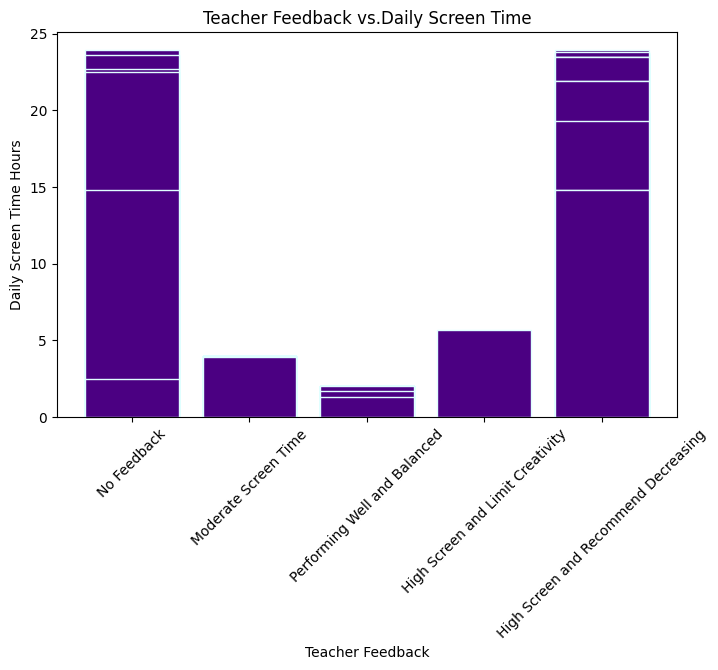

In [75]:
plt.figure(figsize=(8, 5))
plt.bar(encoded_df['Teacher_Feedback'],encoded_df['Daily_Screen_Time_Hours'] , color='indigo', edgecolor='lightcyan')

# Labels and title
plt.xlabel('Teacher Feedback')
plt.ylabel('Daily Screen Time Hours')
tick_labels = [
    'No Feedback', 
    'Moderate Screen Time', 
    'Performing Well and Balanced', 
    'High Screen and Limit Creativity', 
    'High Screen and Recommend Decreasing'
]

plt.xticks(ticks=[0, 1, 2, 3, 4], labels=tick_labels, rotation=45)
plt.title('Teacher Feedback vs.Daily Screen Time')
plt.show()

In [76]:
def tf(row):
    if row['Teacher_Feedback'] == 0:
        return np.random.randint(20, 26)  
    elif row['Teacher_Feedback'] == 1:
        return np.random.randint(2, 5)   
    elif row['Teacher_Feedback'] == 2:
        return np.random.randint(0, 3)    
    elif row['Teacher_Feedback'] == 3:
        return np.random.randint(5, 7)    
    elif row['Teacher_Feedback'] == 4:
        return np.random.randint(23, 25)  
    return row['Daily_Screen_Time_Hours']  

encoded_df['Daily_Screen_Time_Hours'] = encoded_df.apply( lambda row: tf(row), axis=1)


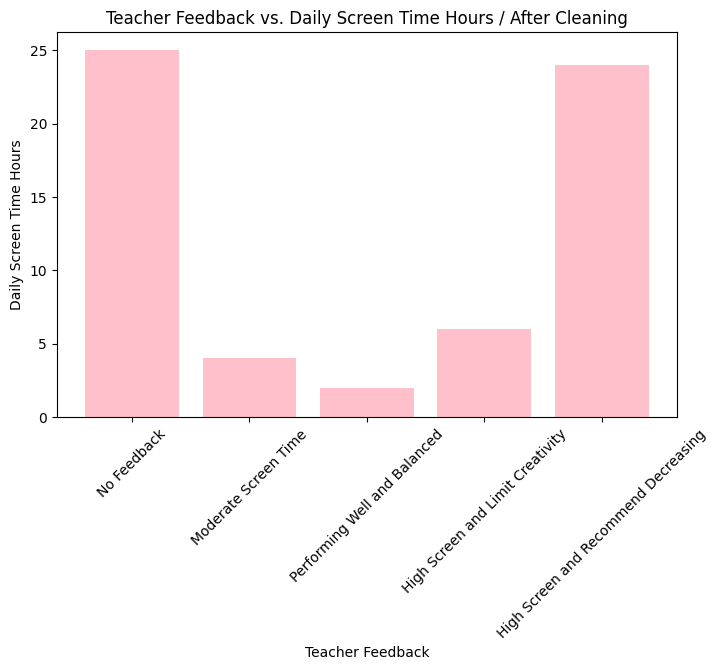

In [77]:
plt.figure(figsize=(8, 5))
plt.bar(encoded_df['Teacher_Feedback'],encoded_df['Daily_Screen_Time_Hours'] , color='pink')

# Labels and title
plt.xlabel('Teacher Feedback')
plt.ylabel('Daily Screen Time Hours')
tick_labels = [
    'No Feedback', 
    'Moderate Screen Time', 
    'Performing Well and Balanced', 
    'High Screen and Limit Creativity', 
    'High Screen and Recommend Decreasing'
]

plt.xticks(ticks=[0, 1, 2, 3, 4], labels=tick_labels, rotation=45)
plt.title('Teacher Feedback vs. Daily Screen Time Hours / After Cleaning')
plt.show()

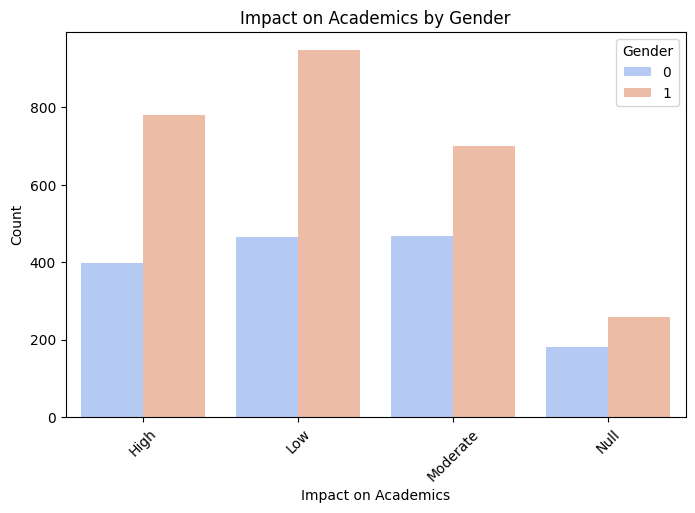

In [78]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Impact_on_Academics", hue="Gender", data=encoded_df, palette="coolwarm")
plt.title("Impact on Academics by Gender")
plt.xlabel("Impact on Academics")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Gender")
tick_labels = ['High', 'Low', 'Moderate', 'Null']
plt.xticks(ticks=[0, 1, 2, 3], labels=tick_labels, rotation=45)
plt.show()

In [79]:
impact_mode_by_gender = encoded_df.groupby("Gender")["Impact_on_Academics"].agg(lambda x: x.mode()[0])

encoded_df.loc[encoded_df["Impact_on_Academics"] == 3, "Impact_on_Academics"] = encoded_df["Gender"].map(impact_mode_by_gender)


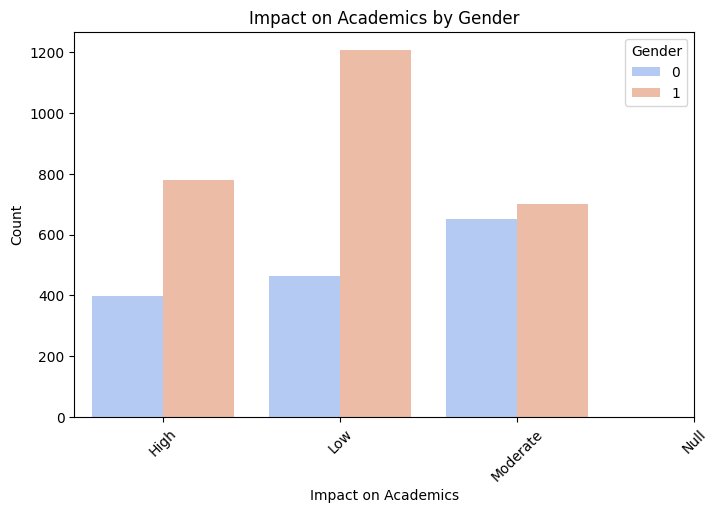

In [80]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Impact_on_Academics", hue="Gender", data=encoded_df, palette="coolwarm")
plt.title("Impact on Academics by Gender")
plt.xlabel("Impact on Academics")
plt.ylabel("Count")
tick_labels = ['High', 'Low', 'Moderate', 'Null']

plt.xticks(ticks=[0, 1, 2, 3], labels=tick_labels, rotation=45)
plt.legend(title="Gender")
plt.show()

In [115]:
encoded_df.dtypes

Child_ID                                         int64
Age                                            float64
Daily_Screen_Time_Hours                          int64
Preferred_Activity                               int64
Device_Dependency_Score                        float64
Emotional_Response_To_No_Device                  int64
Parental_Control_Strictness                    float64
Impact_on_Academics                              int64
Impact_on_Sleep                                  int64
Physical_Activity_Level                          int64
Social_Interactions_Preference                   int64
Parent_Screen_Time_Habits                        int64
Sibling_Influence                                int64
Cognitive_Impact                                 int64
Emotional_Regulation_Use                         int64
Parental_Monitoring_Level                        int64
Gender                                           int64
Teacher_Feedback                                 int64
Participat

In [180]:
# to check for ranges 
encoded_df['Device_Dependency_Score'].max() #20
encoded_df['Device_Dependency_Score'].min() #1
encoded_df['Daily_Screen_Time_Hours'].min() #0
encoded_df['Daily_Screen_Time_Hours'].max() #25

np.int64(25)

In [81]:
def fill_device_dependency(row):
    if row['Daily_Screen_Time_Hours'] <= 6:
        return np.random.randint(1, 5)  
    elif 6 < row['Daily_Screen_Time_Hours'] <= 12:
        return np.random.randint(5, 10)  
    elif 12 < row['Daily_Screen_Time_Hours'] <= 18:
        return np.random.randint(10, 15) 
    elif 18 < row['Daily_Screen_Time_Hours'] <= 25:
        return np.random.randint(15, 20)  

encoded_df['Device_Dependency_Score'] = encoded_df['Device_Dependency_Score'].fillna(encoded_df.apply(fill_device_dependency, axis=1))  

In [82]:
encoded_df['Device_Dependency_Score']

0       10.0
1        6.0
2        8.0
3       10.0
4        1.0
        ... 
4195    10.0
4196    10.0
4197     2.0
4198     2.0
4199     4.0
Name: Device_Dependency_Score, Length: 4198, dtype: float64

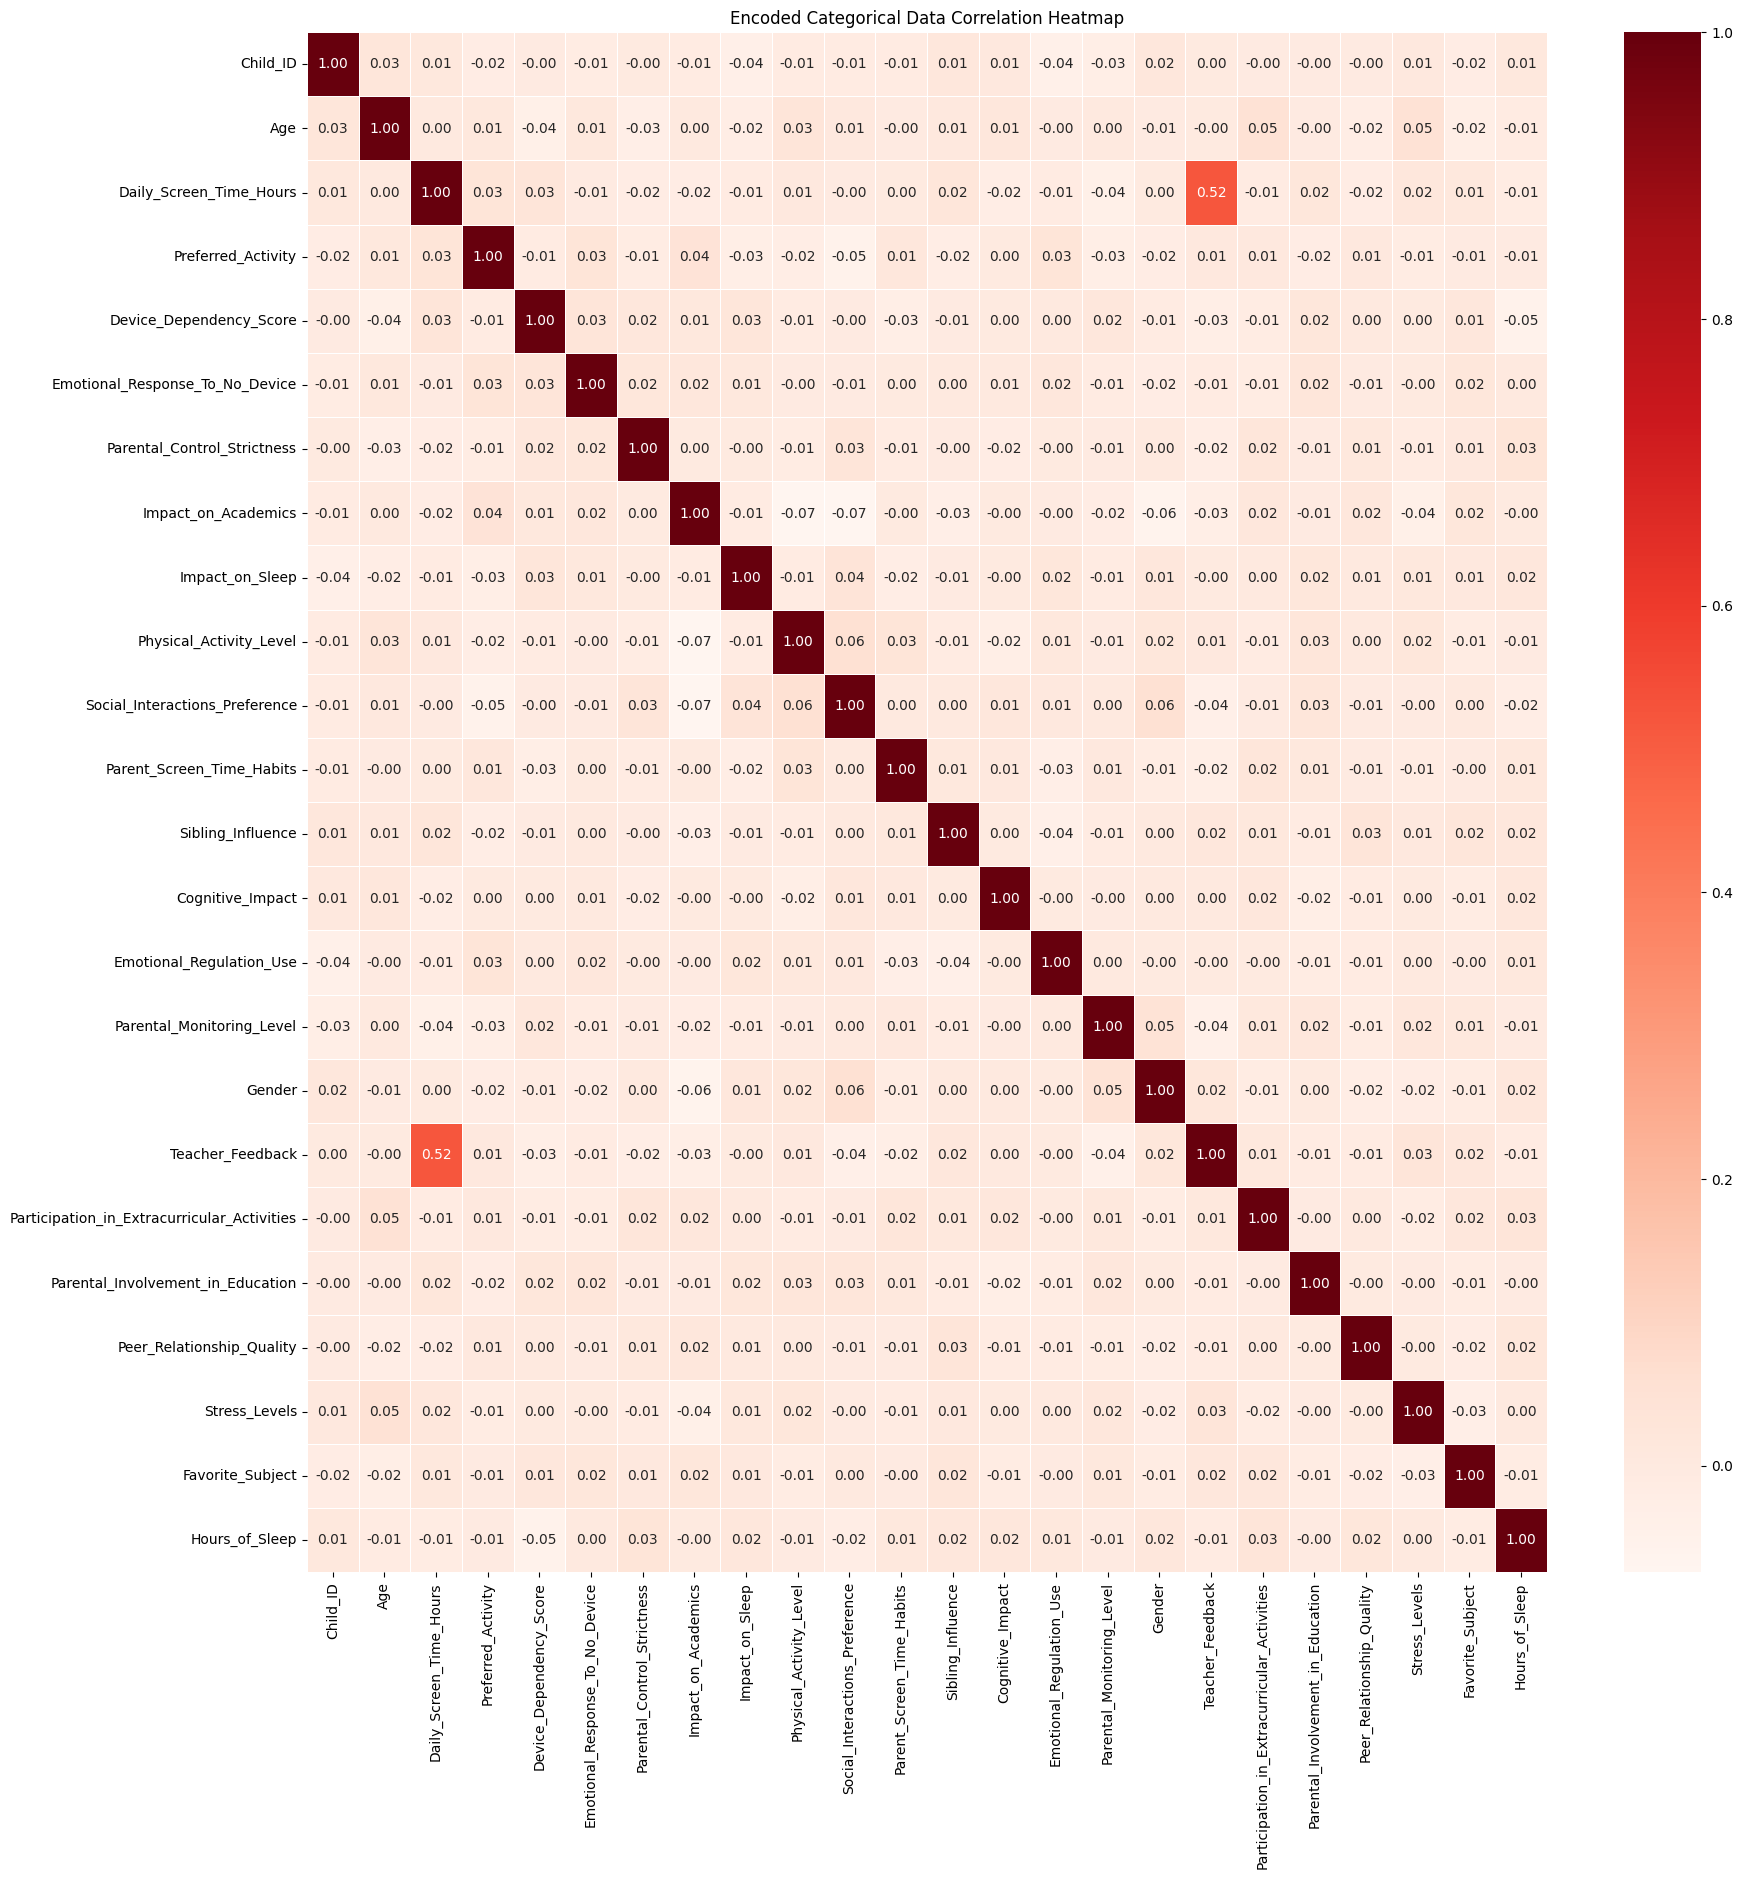

In [89]:
# To check for any new Correlations
plt.figure(figsize=(20, 20))
sns.heatmap(encoded_correlation_matrix, annot=True, cmap="Reds", fmt=".2f", linewidths=0.5)
plt.title("Encoded Categorical Data Correlation Heatmap")
plt.savefig('encoded_correlation_heatmapfinall.png', dpi=300, bbox_inches='tight')

plt.show()

In [84]:
# Compute the median Parental_Control_Strictness for each Hours_of_Sleep group 
median_values = encoded_df.groupby('Hours_of_Sleep')['Parental_Control_Strictness'].median()

encoded_df['Parental_Control_Strictness'] = encoded_df['Parental_Control_Strictness'].fillna(encoded_df['Hours_of_Sleep'].map(median_values))

In [85]:
# Compute the median Age for each Stress_Levels group 
median_values = encoded_df.groupby('Stress_Levels')['Age'].median()

encoded_df['Age'] = encoded_df['Age'].fillna(encoded_df['Stress_Levels'].map(median_values))

In [86]:
encoded_df.isnull().sum()

Child_ID                                       0
Age                                            0
Daily_Screen_Time_Hours                        0
Preferred_Activity                             0
Device_Dependency_Score                        0
Emotional_Response_To_No_Device                0
Parental_Control_Strictness                    0
Impact_on_Academics                            0
Impact_on_Sleep                                0
Physical_Activity_Level                        0
Social_Interactions_Preference                 0
Parent_Screen_Time_Habits                      0
Sibling_Influence                              0
Cognitive_Impact                               0
Emotional_Regulation_Use                       0
Parental_Monitoring_Level                      0
Gender                                         0
Teacher_Feedback                               0
Participation_in_Extracurricular_Activities    0
Parental_Involvement_in_Education              0
Peer_Relationship_Qu

In [87]:
impact_mode_by_Academics = encoded_df.groupby("Impact_on_Academics")["Preferred_Activity"].agg(lambda x: x.mode()[0])

encoded_df.loc[encoded_df["Preferred_Activity"] == 4, "Preferred_Activity"] = encoded_df["Impact_on_Academics"].map(impact_mode_by_Academics)

In [88]:
# 3 is null
columns = [
    'Impact_on_Sleep', 
    'Parent_Screen_Time_Habits', 
    'Social_Interactions_Preference', 
    'Parental_Involvement_in_Education', 
    'Sibling_Influence', 
    'Cognitive_Impact', 
    'Emotional_Regulation_Use', 
    'Participation_in_Extracurricular_Activities', 
    'Parental_Involvement_in_Education',
    'Physical_Activity_Level',
    'Parental_Monitoring_Level']
for col in columns:
    mode_value = encoded_df[col].mode()[0]  
    encoded_df[col] = encoded_df[col].replace(3, mode_value)  

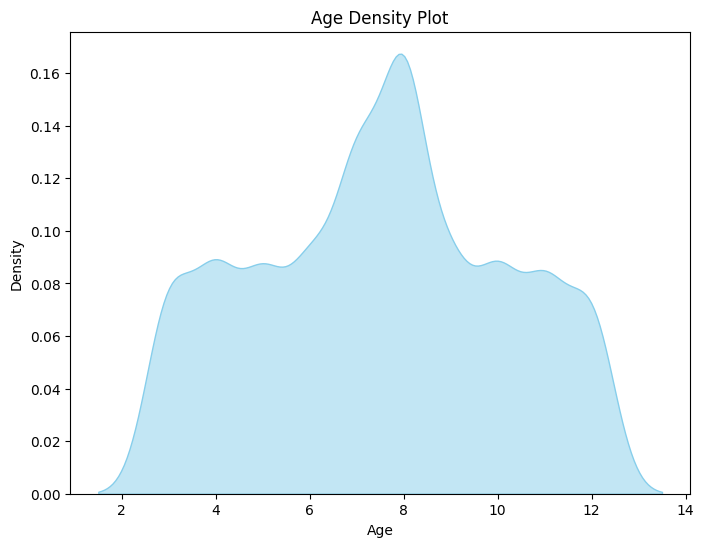

In [194]:
#After
plt.figure(figsize=(8, 6))
sns.kdeplot(encoded_df['Age'], fill=True, color='skyblue', alpha=0.5)

plt.title('Age Density Plot')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

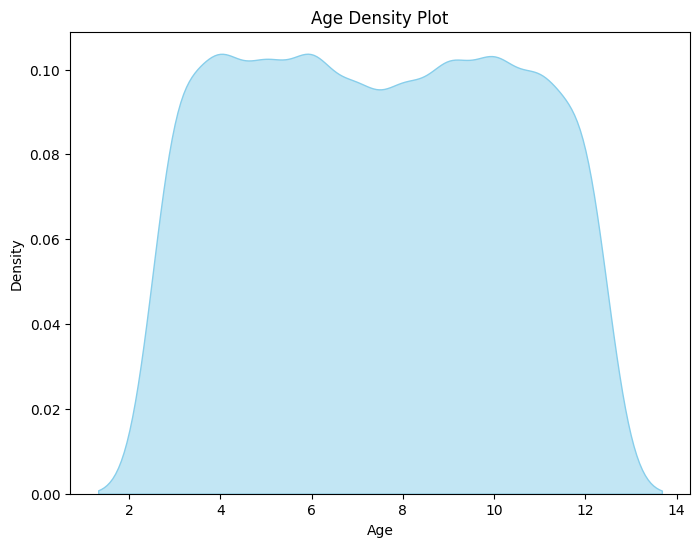

In [192]:
#Before
plt.figure(figsize=(8, 6))
sns.kdeplot(data['Age'], fill=True, color='skyblue', alpha=0.5)

plt.title('Age Density Plot')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

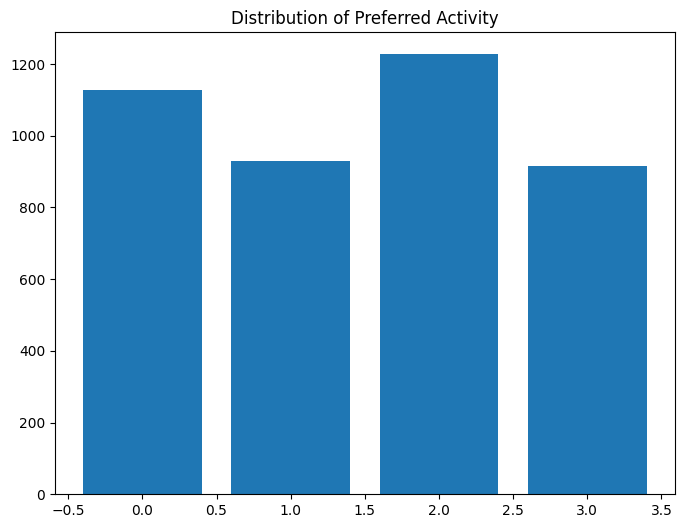

In [92]:
activity_counts = encoded_df['Preferred_Activity'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(activity_counts.index, activity_counts.values)
#labels=['Video Watching', 'YouTube Kids', 'Gaming', 'Educational Apps'], autopct='%1.1f%%', startangle=90
plt.title('Distribution of Preferred Activity')
plt.show()

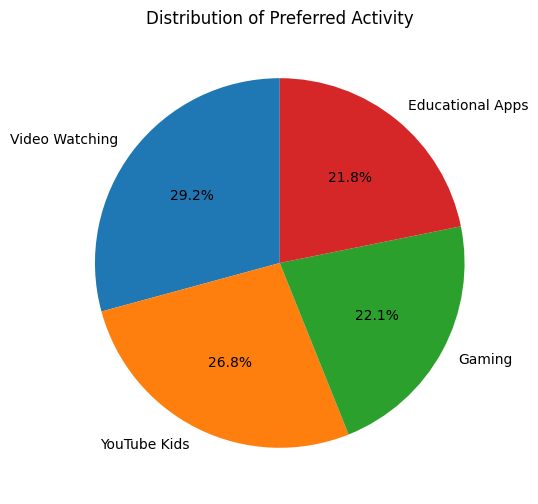

In [199]:
activity_counts = encoded_df['Preferred_Activity'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(activity_counts, labels=['Video Watching', 'YouTube Kids', 'Gaming', 'Educational Apps'], autopct='%1.1f%%', startangle=90)

plt.title('Distribution of Preferred Activity')
plt.show()

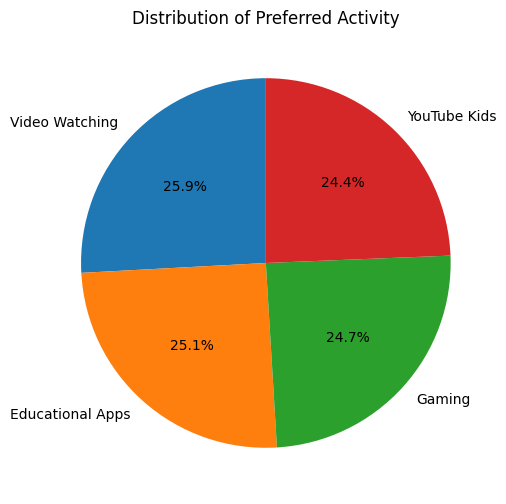

In [198]:
activity_counts = data['Preferred_Activity'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Distribution of Preferred Activity')
plt.show()

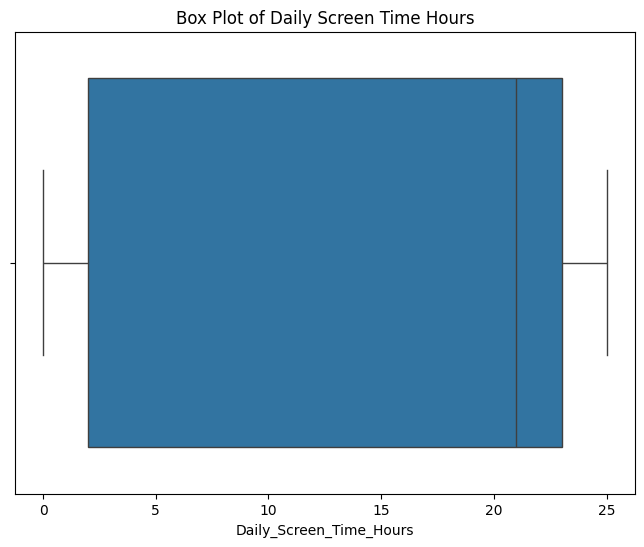

In [200]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=encoded_df['Daily_Screen_Time_Hours'])

plt.title('Box Plot of Daily Screen Time Hours')
plt.show()


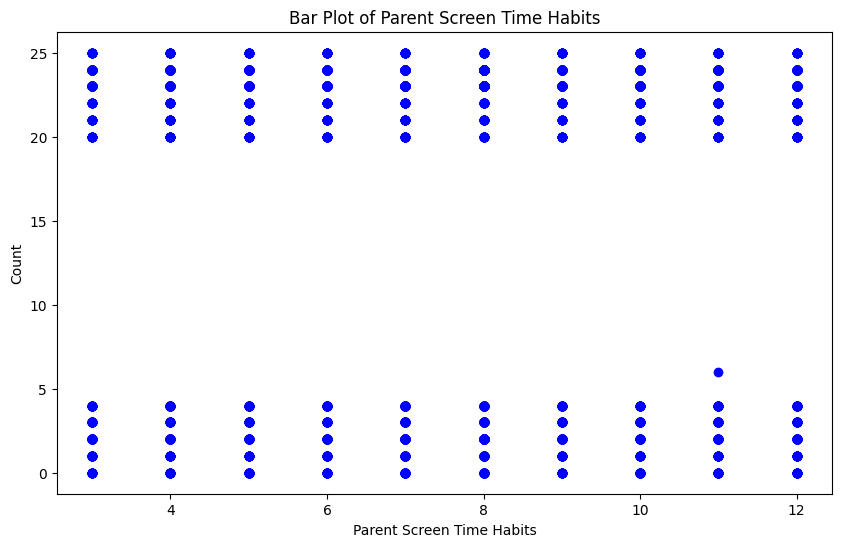

In [94]:
plt.figure(figsize=(10, 6))
#d = encoded_df['Age'].value_counts()
#a = encoded_df['Daily_Screen_Time_Hours'].value_counts()

plt.scatter(encoded_df['Age'], encoded_df['Daily_Screen_Time_Hours'], color='b', label='Parent Screen Time Habits')

plt.title('Bar Plot of Parent Screen Time Habits')
plt.xlabel('Parent Screen Time Habits')
plt.ylabel('Count')

plt.show()

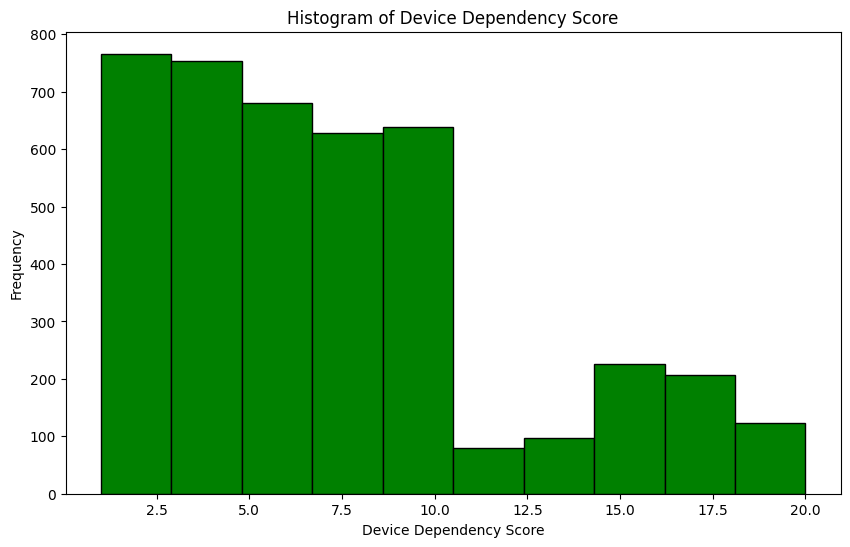

In [210]:
#after
plt.figure(figsize=(10, 6))

plt.hist(encoded_df['Device_Dependency_Score'], bins=10, color='green', edgecolor='black')

plt.title('Histogram of Device Dependency Score')
plt.xlabel('Device Dependency Score')
plt.ylabel('Frequency')

plt.show()

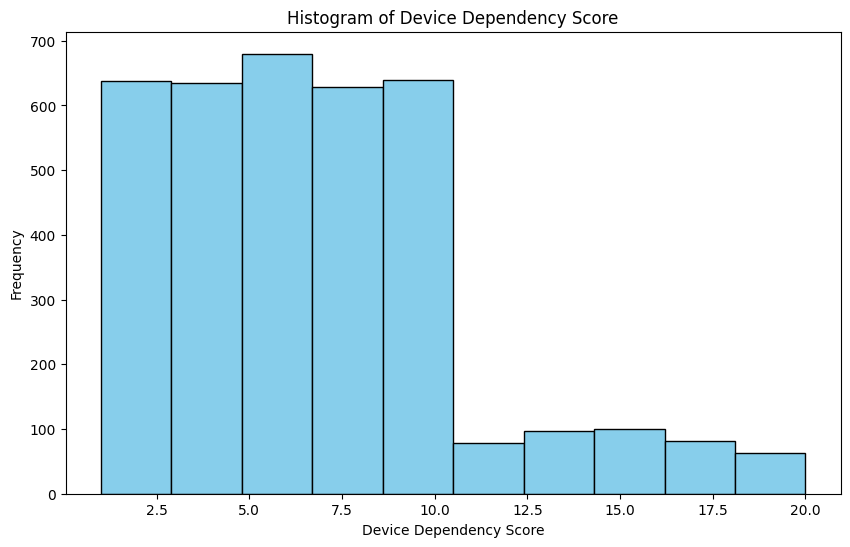

In [211]:
#before
plt.figure(figsize=(10, 6))

plt.hist(data['Device_Dependency_Score'], bins=10, color='skyblue', edgecolor='black')

plt.title('Histogram of Device Dependency Score')
plt.xlabel('Device Dependency Score')
plt.ylabel('Frequency')

plt.show()